In [1]:
import data_processing
import matplotlib.pyplot as plt
from torchvision.transforms import transforms


features, labels = data_processing.read_dataset(['data/data_batch_1'])

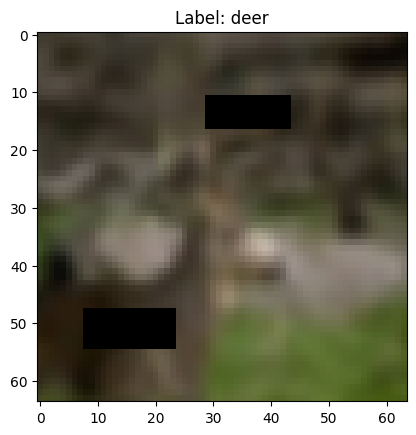

<Figure size 500x500 with 0 Axes>

(64, 64, 3)

In [2]:
import cv2
import numpy as np
img, label = data_processing.sample_one_img(features, labels)

img2 = cv2.resize(img, (64, 64))

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomCrop(np.random.randint(50,64)),
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.03), ratio=(0.3, 1), value=0, inplace=False),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.03), ratio=(0.3, 1), value=0, inplace=False),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.03), ratio=(0.3, 1), value=0, inplace=False),
])

img2_transformed = transform(img2)

plt.imshow(img2_transformed.transpose(0, 1).transpose(1, 2))
plt.title(f'Label: {data_processing.get_class_names()[label]}')
plt.figure(figsize=(5, 5))
plt.show()
img2.shape

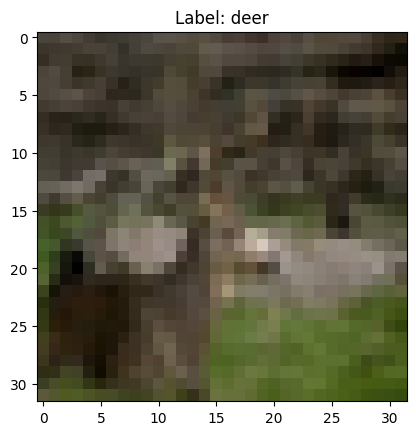

<Figure size 500x500 with 0 Axes>

In [3]:
plt.imshow(img)
plt.title(f'Label: {data_processing.get_class_names()[label]}')
plt.figure(figsize=(5, 5))
plt.show()

In [25]:
import numpy as np
import random
from torchvision.transforms import transforms
import imgaug
import torch
import cv2

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def read_dataset(filename):
    labels = []
    features = None
    for file in filename:
        data = unpickle(file)
        labels_temp = data[b'labels']
        features_temp = data[b'data']
        labels.extend(labels_temp)
        if features is None:
            features = features_temp
        else:
            features = np.vstack((features, features_temp))
    return features, np.array(labels)

def data_augmentation(features, resize):
    # random crop
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomCrop(np.random.randint(50, 64)),
        transforms.Resize((resize, resize)),
        transforms.RandomHorizontalFlip(p=0.5),
        # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.ToTensor(),
        transforms.RandomErasing(p=0.5, scale=(0.02, 0.03), ratio=(0.3, 1), value=0, inplace=False),
        transforms.RandomErasing(p=0.5, scale=(0.02, 0.03), ratio=(0.3, 1), value=0, inplace=False),
    ])
    features = torch.stack([transform(img.transpose(1, 2, 0)) for img in features])
    return features


def get_data(batch_size, resize=None):
    # train
    train_features, train_labels = read_dataset(['data/data_batch_1'])
    if resize is not None:
        train_features = np.array([cv2.resize(img.reshape(3, 32, 32).transpose(1, 2, 0), (resize, resize)).transpose(2, 0, 1) for img in train_features])
    mean = np.mean(train_features, axis=(0, 2, 3))
    std = np.std(train_features, axis=(0, 2, 3))
    # train_features = (train_features - mean.reshape(1, 3, 1, 1)) / std.reshape(1, 3, 1, 1)
    # test
    test_features, test_labels = read_dataset(['data/test_batch'])
    if resize is not None:
        test_features = np.array([cv2.resize(img.reshape(3, 32, 32).transpose(1, 2, 0), (resize, resize)).transpose(2, 0, 1) for img in test_features])
    # test_features = (test_features - mean.reshape(1, 3, 1, 1)) / std.reshape(1, 3, 1, 1)

    return train_features, train_labels, test_features, test_labels

def get_dataiter(features, labels, batch_size, resize=None, train=True):
    if train:
        features = data_augmentation(features, resize)
    else:
        features = torch.tensor(features, dtype=torch.float32)
    dataset = torch.utils.data.TensorDataset(features, torch.tensor(labels, dtype=torch.long))
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=train)
    return data_loader

def get_class_names():
    labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
    return labels

def sample_one_img(features, labels):
    index = random.randint(0, features.shape[0])
    return features[index].reshape(3, 64, 64).permute(1, 2, 0), labels[index]



In [26]:
train_features, train_labels, test_features, test_labels = get_data(batch_size=128, resize=64)

In [27]:
dataiter = get_dataiter(train_features, train_labels, batch_size=128, resize=64, train=True)

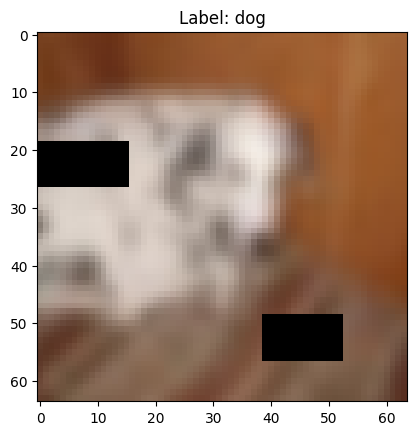

<Figure size 500x500 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt


img, label = None, None
for a, b in dataiter:
    img = a[0].permute(1, 2, 0).numpy()
    label = b[0].item()
    if np.random.random() < 0.1:
        break
plt.imshow(img)
plt.title(f'Label: {get_class_names()[label]}')
plt.figure(figsize=(5, 5))
plt.show()
# img

In [29]:
for i in range(10):
    dataiter = get_dataiter(train_features, train_labels, batch_size=128, resize=64, train=True)

初始化的学习率： 0.1
第1个epoch的学习率：0.100000
第2个epoch的学习率：0.100000
第3个epoch的学习率：0.100000
第4个epoch的学习率：0.100000
第5个epoch的学习率：0.100000
第6个epoch的学习率：0.100000
第7个epoch的学习率：0.100000
第8个epoch的学习率：0.100000
第9个epoch的学习率：0.100000
第10个epoch的学习率：0.100000
第11个epoch的学习率：0.100000
第12个epoch的学习率：0.100000
第13个epoch的学习率：0.100000
第14个epoch的学习率：0.100000
第15个epoch的学习率：0.100000
第16个epoch的学习率：0.100000
第17个epoch的学习率：0.100000
第18个epoch的学习率：0.100000
第19个epoch的学习率：0.100000
第20个epoch的学习率：0.100000
第21个epoch的学习率：0.100000
第22个epoch的学习率：0.100000
第23个epoch的学习率：0.100000
第24个epoch的学习率：0.100000
第25个epoch的学习率：0.100000
第26个epoch的学习率：0.100000
第27个epoch的学习率：0.100000
第28个epoch的学习率：0.100000
第29个epoch的学习率：0.100000
第30个epoch的学习率：0.100000
第31个epoch的学习率：0.010000
第32个epoch的学习率：0.010000
第33个epoch的学习率：0.010000
第34个epoch的学习率：0.010000
第35个epoch的学习率：0.010000
第36个epoch的学习率：0.010000
第37个epoch的学习率：0.010000
第38个epoch的学习率：0.010000
第39个epoch的学习率：0.010000
第40个epoch的学习率：0.010000
第41个epoch的学习率：0.010000
第42个epoch的学习率：0.010000
第43个epoch的学习率：0.010000
第44个epo

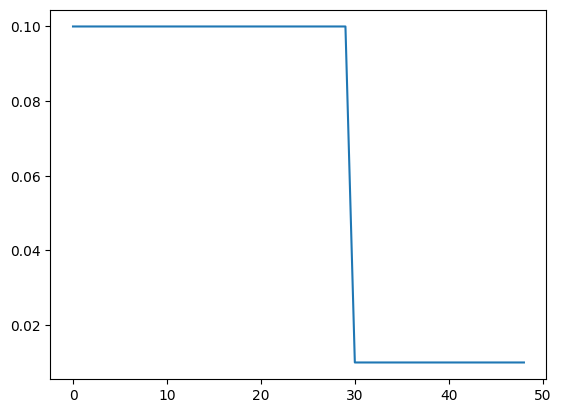

In [17]:
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import LambdaLR
import matplotlib.pyplot as plt
 
initial_lr = 0.1
 
net_1=nn.Sequential(
    nn.Linear(1,10)
)
 
optimizer_1 = torch.optim.Adam(
    net_1.parameters(), 
    lr = initial_lr)

def lambda1(epoch):
    if epoch < 30:
        return 1
    else:
        return 0.1

scheduler_1 = LambdaLR(
    optimizer_1, lr_lambda=lambda1)
 
print("初始化的学习率：", optimizer_1.defaults['lr'])
ls = []
for epoch in range(1, 50):
    optimizer_1.zero_grad()
    optimizer_1.step()
    print("第%d个epoch的学习率：%f" % (epoch, optimizer_1.param_groups[0]['lr']))
    ls.append(optimizer_1.param_groups[0]['lr'])
    scheduler_1.step()
plt.plot(ls)